> "Math is the logic of certainty; statistics is the logic of uncertainty." - Joe Blitzstein

Before posting too much, I thought it would be worth reviewing probability theory, which is really the foundation of all data science. This post is also intended to serve as a quick (and unfortunately incomplete) reference guide, from which you can pull specific pieces of information .

# <a name = 'events'></a> Events and Random Variables

In statistics, we like to think about the *outcomes* of *random experiments.* For example, one random experiment might be that my roommate rolls a pair of dice. There are 12 possible outcomes to this event: he could roll a $2$, $3$, $4$, etc. However, we can also group different outcomes together into *events*: for example, we might denote $A$ as the event that my roommate rolls an odd number.

More mathematically, we might have a set $\Omega$, called the sample space, which contains all the possible outcomes of a random experiment. An outcome $\omega$ is an element of the sample space, i.e. $\omega \in \Omega$, and an event $A$ is a subset of the sample space, i.e. $A \subset \Omega$. In the previous example, 

$$ \Omega = \{ \text{ roll a $2$, roll a $3$, roll a $3$, }\dots, \text{ roll a $12$ } \} $$
$$ \omega = \{ \text{ roll a $1$ } \}$$
$$ A = \{ \text{ roll an odd number } \} $$

Because the experiment is random, we assign each event a *probability* between $0$ and $1$. For some event $A$, we usually denote this probability as $P(A)$.

It's important to note that although each outcome is *associated* with a number, each outcome is *not* a number: it's a different kind of mathematical object. However, we might decide want want to *represent* each outcome with a number, and this is where random variables come in.

A *random variable* is a function from the sample space to the real number line. Before a random event occurs, the random variable is like a black box: we can't know precisely what its value will be. After an experiment however, the random variable crystallizes to some real number associated with an outcome of the experiment. More formally, $X$ is a random variable if 
$$X : \Omega \to \mathbb{R}$$

Note that we tend to represent random variables with *capital letters*, and deterministic/nonrandom variables with lowercase letters.

If we wanted to, we could also define random vectors as maps from the sample space to lists of real numbers, i.e. 
$$ (X_1, \dots, X_n) = \vec{X} : \Omega \to \mathbb{R}^n$$

For now, however, let's stick to the univariate (non-vector) case. As an example, let $X$ be the number that the sum of the values that my roommate rolls on a pair of dice. Then, if Alex rolls a $3$ and a $4$, $X$ would crystallize to a value of $7$; and if Alex rolls an $6$ and a $2$, $X$ would crystallize to a value of $2$, et cetera. In this way, random variables are random because their value depends on the outcome of the random experiment.

It's important to note that when we write an expression like $X = 4$ or $X \le 3$, these expressions describe *events*. Recall that an event is a simply a subset of the sample space; and $X = 4$ is true only in a subset of the sample space (in our example, only if Alex's rolls sum to $4$).

Random variables have *distributions* which describe how likely they are to take on certain values after the experiment has concluded. For example, our random variabel $X$ from the last paragraph will never take on an odd value - this is a fact about its distribution. We can simulate the dice rolls and look at the distribution below:

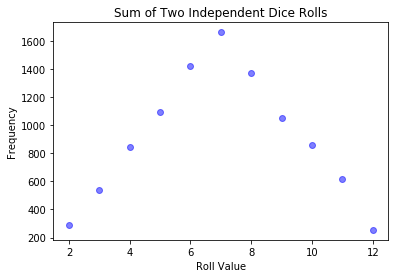

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 10000 rolls
dice1 = np.random.randint(1, 7, size = 10000)
dice2 = np.random.randint(1, 7, size = 10000)
roll = dice1 + dice2

# Plot
roll_counts = np.unique(roll, return_counts = True)
plt.scatter(roll_counts[0], roll_counts[1], color = 'blue', alpha = 0.5)
plt.title('Sum of Two Independent Dice Rolls')
plt.xlabel('Roll Value')
plt.ylabel('Frequency')
plt.show()

Although it's nice to visualize distributions, we also want to be able to write them down mathematically. We typically do this in one of three ways ways (although these are not the only three ways to specify a distribution).

## Culmulative Distribution Functions

First, we can try to work with the *Culmulative Distribution Function* (CDF). The CDF of a random variable is a function $F$ which takes in a real number $y$ and returns the probability that the random variable is less than or equal to $y$. 
$$F(y) = P(X \le y)$$

For example, we can plot an empirical CDF of the data above.

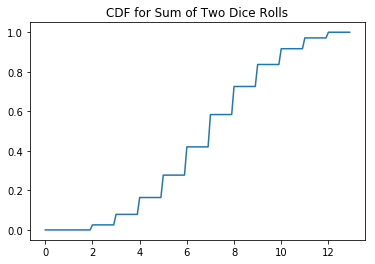

In [3]:
# Create CDF
def my_cdf(y):
    result = sum(roll <= y)/10000
    return result
my_cdf = np.vectorize(my_cdf)

# Plot
x_values = np.arange(0, 130, 1).astype(np.float32)/10
output = my_cdf(x_values)
plt.plot(x_values, output)
plt.title('CDF for Sum of Two Dice Rolls')
plt.show()

CDFs are useful because we can use them to calculate the probability that a random variable will lie in any arbitrary interval. In particular,

$$P(a < X < b) = P(X \le b) - P(X \le a) = F(b) - F(a)$$

## Probability Mass Functions

Some distributions are *discrete*, in that they can only take on quantized or "spaced out" values. For example, our example random variable $X$ was discrete because it could only crystallize to become an whole number, but it could never crystallize to a fraction. We often use something called the Probability Mass Function, or PMF to describe the distribution of discrete random variables. If we denote the PMF as $P_X$, then for any real number $y$, 
$$P_X(y) = P(X = y)$$

We'll plot an empirical PMF of the data above.

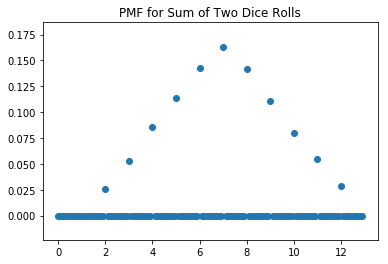

In [4]:
# Create PMF
def my_pmf(y):
    result = sum(roll == y)/10000
    return result
my_pmf = np.vectorize(my_pmf)

# Plot
output = my_pmf(x_values)
plt.scatter(x_values, output)
plt.title('PMF for Sum of Two Dice Rolls')
plt.show()

Note that because $X$ is discrete, the PMF is zero almost everywhere - it only takes on nonzero values at a couple of whole numbers (2 through 12).

## Probability Density Functions

Other distributions are *continuous*, in that they can take on any real value. We can't use a PMF to describe discrete distributions, because the probability that they take on any particular value is $0$! Although we can still use the CDF to describe the probability that they'll land in a particular *interval*, we might still want something a bit more analagous to the PMF. The solution is to use a **probability density function**, which is the **derivative of the CDF**. To understand how this works, let's look at the distribution of a "mystery" random variable. 

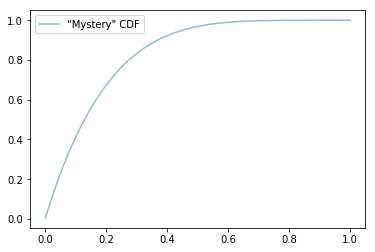

In [25]:
from scipy import stats
x_values = np.arange(1, 1000, 1).astype(np.float32)/1000
cdf_values = stats.beta.cdf(x_values, 1, 5)

plt.plot(x_values, cdf_values, alpha = 0.5, label = '"Mystery" CDF')
plt.legend()
plt.show()

Let's try to interpret this arbitrary CDF. Recall that the CDF $F$ for a random variable $X$ is simply the probability that $X$ will be less than or equal to $x$: $F(x) = P(X \le x)$. Here, $F(0)$ is $0$, meaning that our random variable $X$ wil never be less than $0$. However, the slope of the CDF is pretty high: the CDF increases very quickly, until at $x = 0.1$, $F(0.1) \approx 0.5$. Like we discussed earlier, this means that $X$ is very likely to appear in the range between $0$ and $0.1$. On the other hand, the slope of the CDF is very small (almost $0$) between $0.6$ and $0.9$, implying that $X$ will almost never appear in that range.

We can take this idea to its limit (get it!) by taking the derivative of the CDF, which corresponds to limit of the probability that $X$ will fall into a bin around some value as the size of the bin gets smaller and smaller. This derivative is the PDF, and just as we suspected, it is very high while $x$ is close to $0$, and drops off as $x$ increases.

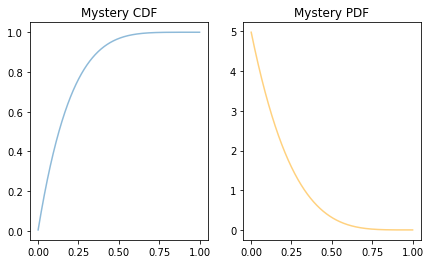

In [10]:
pdf_values = stats.beta.pdf(x_values, 1, 5)

fig, (ax2, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(7, 4))
ax1.plot(x_values, pdf_values, color = 'orange', alpha = 0.5)
ax2.plot(x_values, cdf_values, alpha = 0.5)
ax1.set_title("Mystery PDF")
ax2.set_title("Mystery CDF")
plt.show()

At this point, the difference between a "Probability Mass Function" and a "Probability Density Function" might be a bit clearer, especially if you've ever done any physics. For a probability *mass* function of a *discrete* random variable, there is actual *mass*, or a finite probability, associated with many points.

On the other hand, for a continuous random variable, there's no finite probability associated with any point, so instead we associate each point with a *density*.

## Expectation, Variance, and Moments

### Expectation

The **expectation**, or mean, of a distribution is intuitively its "average value."  Mathematically, we can define the expectation of a random variable, denoted $E(X)$, as follows. Let $A$ be the *support* of $X$, i.e. the set of values $k$ for which $P(X = k)$ is nonzero. In the discrete case, $X$, we define 
$$E(X) = \sum_{k \in A} k \cdot P(X = k) $$
In the continuous case, since $P(X = k) = 0$ for every $k$, we use its PDF instead. If $f$ is the pdf of $X$, then we define
$$E(X) = \int_{x \in A} x f(x) \, dx  $$
If you're familiar with the Riemann–Stieltjes integral, we can unify both definitions. For $F$ the cdf of $X$, we define
$$E(X) = \int_{x \in A} x dF(x) $$
although if you don't know this notation, that's completely fine.

Because integrals and sums are linear operators, expectation is linear too: in other words, for any two random variables $X$ and $Y$, and some constants $a, b \in \mathbb{R}$, 
$$E(aX + bY) = aE(X) + bE(Y)$$

The Law of the Unconscious Statistician, known as LOTUS, states that we can actually extend this definition and compose an arbitrary real-valued function $g$ on $X$. More specifically, 

$$E(g(X)) = \begin{cases} \int_{x \in A} g(x) f(x) \, dx & \text{X is continuous } \\
                          \sum_{k \in A} g(k) \cdot P(X = k) & \text{X is discrete }\end{cases}$$

                        
### Variance

The variance of a random variable measures the "spread" of its distribution. More precisely, the variance is defined as the expected squared distance between a random variable and its own expectation. I.e. for any $X$,

$$\text{Var}(X) = E\bigg( (E(X) - X)^2 \bigg) $$

Using the linear properties of expectation, we can simplify to find that
$$\text{Var}(X) = E\bigg( E(X)^2 - 2 XE(X) + E(X)E(X) \bigg)$$
$$= E \Big(X^2\Big) - E\Big(2 X E(X)\Big) + E\Big( E(X)E(X)\Big)$$
Because expectation is linear, and the value $E(X)$ is a constant, we can pull rearrange as follows
$$ \text{Var}(X) = E(X^2) - 2E(X)^2 + E(X)^2 = E(X^2) - E(X)^2 $$ 

We define the **standard deviation** as the square root of the variance:

$$\text{SD}(X) = \sqrt{\text{Var}(X)}$$

I've plotted the expectations and variances of a couple of common distributions below, because visualization aids intuition!

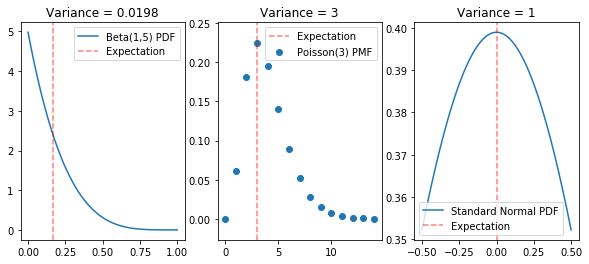

In [50]:
fig, (ax3, ax2, ax1) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(10, 4))

ax3.plot(x_values, pdf_values, label = 'Beta(1,5) PDF')
ax3.axvline(x=1/6, color = 'Red', alpha = 0.5, linestyle = 'dashed', label = 'Expectation')
ax3.set_title("Variance = {}".format(0.0198))
ax3.legend()

poisson_x_values = np.arange(0, 15, 1)
ax2.scatter(poisson_x_values, stats.poisson.pmf(3, poisson_x_values), label = 'Poisson(3) PMF')
ax2.axvline(x = 3, color = 'Red', alpha = 0.5, linestyle = 'dashed', label = 'Expectation')
ax2.set_title('Variance = {}'.format(3))
ax2.legend()

ax1.plot(x_values - 0.5, stats.norm.pdf(x_values - 0.5), label = 'Standard Normal PDF')
ax1.axvline(x=0, color = 'Red', alpha = 0.5, linestyle = 'dashed', label = 'Expectation')
ax1.set_title('Variance = {}'.format(1))
ax1.legend()

### Moments

More generally, we define the $k$th **moment** of $X$ to be the value $E(X^k)$. It's hard to find moments, but one we can do it is by using **generating functions**. The moment generating function $M(t)$ is defined as follows: 

$$M(t) = E(e^{tX})$$

Although this does *not* seem to be related to moments in the first place, it helps if we think about it as a [Taylor series](https://en.wikipedia.org/wiki/Taylor_series#Exponential_function). Specifically, the Taylor series for $e^x$ is 
$$e^x = \sum_{n = 0}^\infty \frac{x^n}{n!}$$
So using the linearty of expectation, we can rewrite the moment generating function as
$$M(t) = E \bigg(\sum_{n = 0}^\infty \frac{(tX)^n}{n!} \bigg) = \sum_{n=0}^\infty \frac{t^n E(X^n)}{n!}$$

And now we see that the $E(X^n)$ popping up as a part of each term in the sum. Moment generating functions can be a bit confusing, but extremely useful. I may end up doing an entire post on them for this reason.


# Conditioning

> "Conditioning is the soul of statistics." - Joe Blitzstein

Often, we have not observed the full result of an experiment, but we might have observed *part* of the result, and we want to use this information to help predict the rest of the experiment. In other words, if some event $B$ has already occured, but we want to know the probability of some other event $A$ given $B$. We denote this as $P(A | B)$ where the $|$ symbol means "given."

How can we calculate this probability? Well, one way to think about this is to reduce the size of our [sample space](#events), and to throw away all the outcomes where $B$ does not occur, because we know that $B$ did in fact occur. Then, we can simply check the proportion of outcomes left in which $A$ occurs. Another way to phrase this is to write
$$P(A|B) = \frac{P(A, B)}{P(B)}$$
where $P(A,B)$ is the probability that *both* $A$ and $B$ occur. With this definition, we can also see that
$$P(A|B) P(B) =  \frac{P(A, B)}{P(B)} P(B) = P(A, B)$$
and similarly
$$P(B|A) P(A) = P(A,B)$$
due to cancellation; this holds for any number of events and is often referred to as the **chain rule of proabbility**. For example, for any four events we know 
$$P(A|B, C, D) P(B|C, D) P(C|D) P(D) = P(A, B, C, D)$$ 
for the same reason. By this identity, it logically follows that
$$P(A|B) = \frac{P(A,B)}{P(B)} = \frac{P(B|A) P(A)}{P(B)}$$

This result is actually one of the fundamental theorems of statistics: it is known as **Bayes' Rule**.

## Independence

Two events $A, B$ are defined to be **independent** if and only if $P(A, B) = P(A) P(B)$.  What does this mean? Remember, $A$ and $B$ are events, or a subset of outcomes of some experiment. For example, if we think of the wheel of fortune as a random experiment, $A$ could be the event that you win over 1000 dollars, could be the event that you win some sort of vacation as your price.

With this in mind, we can construct an intuitive understanding of independence. Events $A$ and $B$ are independent if knowing that one occurs gives you no information about whether the other will occur; i.e. perhaps you spin two separate wheels, one which might reward you with a vacation, and one which might reward you with cash. On the other hand, if $P(A,B) < P(A)P(B)$, then knowing that $A$ occurs makes $B$ less likely to occur, and vice versa - perhaps the game show host only allows you to win *either* a vacation or cash. Or finally, if $P(A,B) > P(A)P(B)$, then knowing $A$ occured makes $B$ more likely to occur, and vice versa.

In the context of random variables, independence is rather similar. Two random variables $X$ and $Y$ are independent if and only if for any $a, b, c, d \in \mathbb{R}$, 

$$P(a < X < b)P(c < Y < d) = P(a < X < b, c < Y < d)$$

Just like in the case of events, the intuitive way to interpret this is that $X$ and $Y$ are independent if and only if knowing $X$ tells you absolutely nothing about $Y$. 

One last piece of terminology is important: we say that $X$ and $Y$ are **i.i.d.** if they are independent and have the exact same distribution (i.i.d. stands for "independent and identically distributed").  We often think about i.i.d.-ness because it allows us to apply the [central limit theorem](#normal), which we'll talk about later. 

## Joint and Conditional Distributions

For a random variable $X$, recall that expressions like $X = \pi$ or $X < 2.5$ correspond to events. For this reason, we can apply the framework of conditional probability and independence to random variables as well. For example, we might have observed a random variable $Y$ but not $X$. Then, using Bayes' Rule, we can calculate the *conditional distribution* of $X$ as follows:

$$P(X = n|Y = m) = \frac{P(Y = m | X = n) P(X = n)}{P(Y = m)}$$

Note that if $X$ or $Y$ are continuous, we can simply replace the Probability Mass functions above with PDFs. Note that if $X$ and $Y$ are independent, then $P(Y = m|X = n) = P(Y = m)$ in all cases; and therefore
$$P(X = n | Y = m) = \frac{P(Y = m ) P(X = n)}{P(Y = m)} = P(X = n)$$
This result makes sense, because if $X$ and $Y$ are independent, then knowing one gives you no information about the other: therefore, knowing $Y$ should not change $X$'s distribution.

Even if we haven't observed $X$ or $Y$, we often want to calculate their joint distribution, meaning we want to know the probability (or density) that $X = n$ and $Y = m$ at the *same time*. For example, if $X$ and $Y$ are discrete, we might want to calculate their *joint PMF*, i.e. $P(X = n, Y = m)$, or alternatively if they are continuous, their joint density $p_{x, y}(x,y)$.

Remember that in general, just knowing the distributions of $X$ and $Y$ is not enough to tell us their joint distribution: or more formally, $P(X = n, Y = m) \ne P(X = n)P(Y=m)$, because $X$ and $Y$ might not be independent. As a simple example, imagine $X$ is the [indicator random variable](#events) for a coin landing heads, and $Y$ is the indicator random variable for the coin landing tails. In this case, $P(X = 1, Y = 1) = 0$, because if $X = 1$, then the coin lands heads, so $Y = 0$. However, $P(X = 1) P(Y = 1) = \frac{1}{2} \cdot \frac{1}{2} = \frac{1}{4}$.

We often calculate the joint PDF by simply applying the laws of conditional probability. For example, suppose $X$ and $Y$ are continuous, we know the distribution $p_x$ of $X$, and we know the conditional distribution $p_{y|x}$ of $Y$ given $X$. Then, we may calculate
$$ p_{x, y} = p_x(x) p_{y|x}(y|x)$$

## Covariance

The **covariance** of two random variables $X$ and $Y$ are is defined as 

$$\text{Cov}(X, Y) = E\bigg( (X - E(X)) (Y - E(Y)) \bigg)$$
$$= E(XY) - E(X)E(Y)$$

Although the rightmost expression is often very useful in practice, the middle expression can help us get a sense of what covariance actually means. $E\bigg( (X - E(X)) (Y - E(Y)) \bigg)$ will only be large if in the cases when $X$ is significantly greater than its mean, $Y$ will also be greater than its mean, and vice versa. This is what it means for $X$ and $Y$ to have a "positive covariance." On the other hand, $Y$ and $X$ will have a *negative* covariance if $X$ being "larger than normal" implies $Y$ will likely be "smaller than normal." Let's look at some very simple examples.

Suppose $X$ is any random variable, and $Y = 2X$. In this case, $X$ and $Y$ have positive covariance, because if $X$ is larger than it mean, then $Y$ is guarenteed to be larger than its mean as well, since $Y = 2X$. On the other hand, if we set $Y = -2X$, then $X$ and $Y$ would have negative covariance, because if $X$ was quite large, then $Y$ would be highly negative. 

We often think about the *covariance matrix* of two random vectors, which is simply a matrix holding the covariance of each of the components of the two vectors. More specifically, for $X, Y$ which are random vectors in $\mathbb{R}^n$, define $\text{Cov}(X, Y)$ as:
$$ \begin{bmatrix} \text{Cov}(X_1, Y_1) & \text{Cov}(X_1, Y_2) & \dots & \text{Cov}(X_1, Y_n)
\\ \text{Cov}(X_2, Y_1) & \text{Cov}(X_2, Y_2) & \dots & \text{Cov}(X_2, Y_n) 
\\ \vdots & \vdots & \vdots & \vdots 
\\ \text{Cov}(X_n, Y_1) & \text{Cov}(X_n, Y_2) & \dots & \text{Cov}(X_n, Y_n)\end{bmatrix}$$

It's worth noting that the covariance matrix is always symmetric because $\text{Cov}(X_i, Y_j) = \text{Cov}(Y_j,X_i)$. If you're familiar with Linear Algebra, it's worth knowing that the covariance matrix is *usually*, but not always, positive semi-definite as well. 

## Conditional Independence

Imagine that we are interested in the height, education level, and age of a random person in the United States. Let $X$ be the random variable denoting their height, let $Y$ denote their education level in some way, and let $Z$ denote their age. To begin with, we should note that $X$ (height) and $Y$ (education level) are *not* independent: on average, shorter people tend to have lower education levels than taller people. How do I know this? It's becauase shorter people tend to be *younger*, and younger people haven't gone to school for as long!

Here, $X$ (height) and $Y$ (education level) are not independent, because they are both influenced by a third random variable, $Z$ (age). However, we still might feel like there is *some* kind of independence relation between height and education level, because other than the fact that age affects both, there probably isn't a strong relationship between how tall someone is and whether they decide to go to school. Formally, we might say that height and education level are **conditionally** independent given age, or that $X$ and $Y$ are independent given $Z$.

Mathematically, conditional independence looks very similar to regular independence, just with an extra piece of conditioning. Specifically, we define $X$ and $Y$ to be conditionally independent given $Z$ if and only if
$$P(X,Y|Z) = P(X|Z) P(Y|Z)$$
for all values of $X$, $Y$, $Z$. Conditional independence is extremely important in modeling, because if we have some random variables $Y_1, \dots, Y_n$ which are all conditionally independent given $X$, then we may factor the joint distribution as follows:

$$p(x, y_1, \dots, y_n) = p(x) p(y_1, \dots, y_n | x) = p(x) \prod_{i=1}^n p(y_i|x) $$

which turns out to be an extremely useful identity in pretty much every modeling setting.

We just saw an example (height, age, education) that conditional independence does not imply unconditional independence - in other words $X$ and $Y$ might be conditionally independent given $Z$, but that does not imply they will be conditionally independent. Interestingly, it turns out that unconditional independence (regular independence) does not imply conditional indepence either. As an example, imagine that you flip two coins independently, so that $X$, the result of the first flip, is independent from $Y$, the result of the second flip. However, imagine we have some $Z$, which tells us the total number of heads in both flips! Then, if we know $X$ and $Z$, we can do some subtraction to find $Y$ as well; so $X$ and $Y$ are unconditionally independent, but they are *not* conditionally independent given $Z$.


# <a name = "distributions"></a> Fundamental Distributions

There are "dozens" of fundamental distributions in statistics, but here is a brief review of five simple but extremely useful distributions. Note that for some distribution I use the $X \sim distribution $ notation to illustrate that a random variable $X$ is distributed according that distribution. 

## Bernoulli and Binomial

If a random variable $X \sim Bern(p)$, then $X$ has a distribution chracterized by the following PMF:

$$P(X = 1) = p, \, \, P(X = 0) = q = 1 - p$$

Intuitively, this means that $X$ is basically a weighted coin toss: it has a $p$ chance of crystallizing to the value $1$, and otherwise will crystallize to the value $0$. This is called the **Bernoulli**, which we often use to characterize binary events (i.e. whether a coin will land heads/tails).

The **binomial** distribution is intimately related to the Bernoulli. From a mathematical point of view, we say that if $ X \sim Bin(n, p)$, then its distribution is characterized by the following PMF:

$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$ 

This looks a bit complicated, but is actually rather easy to interpret. Intuitively, if $X \sim Bin(n, p)$, then $X$ can be thought of as the number of heads you'll observe if you flip a weighted coin $n$ times, where each flip has a $p$ probability of landing heads. More formally, a binomially distributed random variables is identically distributed to the sum of a bunch of independent Bernoulli random variables: 

$$ X  \sim Bin(n, p) \implies  X \sim X_1 + X_2 + \dots + X_n$$
where $X_i \sim \text{Bern}(p) $.

How does this relate to the PMF from above? Well, let's consider the Binomial as a sum of Bernoulli's. We want to find the probability that there will be $k$ coins landing heads. For any sequence involving $k$ heads, like below:
$$ H, \, T, \, T, \, H, \, T, \, H, \dots \, H \, T \text{ (assume there are $k$ heads in this sequence) }$$

the probability of that exact sequence occuring is $p^k (1-p)^{n - k}$, because $k$ heads and $n-k$ tails must land in precisely that order. However, for each $k$, there are $\binom{n}{k}$ possibly orderings of tails/heads with exactly $k$ heads, so therefore there probability that any one of those sequences will come to pass is
$$ P(X = k) = \binom{n}{k} p^k (1-p)^k$$
as before.

From a modeling perspective, these two distributions are pretty clearly important. In particular, the Bernoulli is often used to model binary events (i.e. a coin flip), and the Binomial is often used to count the number of "successful" trials in a fixed number of events. 

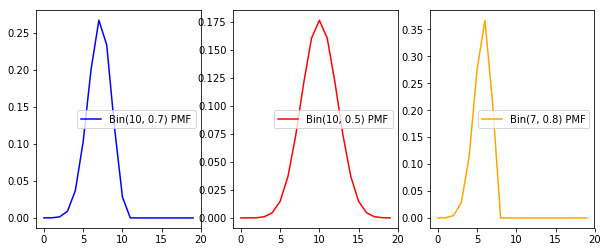

In [26]:
fig, (ax3, ax2, ax1) = plt.subplots(nrows=1,ncols=3, sharey=False, figsize=(10, 4))

x_values = np.arange(0, 20, 1)

ax3.plot(x_values, stats.binom.pmf(x_values, 10, 0.7), color = 'blue', label = 'Bin(10, 0.7) PMF')
ax3.legend()

ax2.plot(x_values, stats.binom.pmf(x_values, 20, 0.5), color = 'red', label = 'Bin(10, 0.5) PMF')
ax2.legend()

ax1.plot(x_values, stats.binom.pmf(x_values, 7, 0.8), color = 'orange', label = 'Bin(7, 0.8) PMF')
ax1.legend()

plt.show()

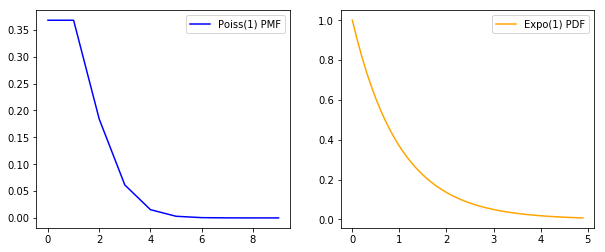

In [17]:
fig, (ax2, ax1) = plt.subplots(nrows=1, ncols=2,  sharey=False, figsize=(10, 4))

x_values = np.arange(0, 10, 1)
ax2.plot(x_values, stats.poisson.pmf(x_values, 1), color = 'blue', label = 'Poiss(1) PMF')
ax2.legend()

new_x_values = np.arange(0, 50, 1).astype(np.float32)/10
ax1.plot(new_x_values, stats.expon.pdf(new_x_values), color = 'orange', label = 'Expo(1) PDF')
ax1.legend()

plt.show()


## <a name = "normal"></a> Gaussian/Normal 

The **Gaussian** or **Normal** distribution is probably the most famous distribution in all of statistics, for good reason. It has a number of unique properties, but we'll start by looking at its PDF. Let $X \sim \mathcal{N}(\mu, \sigma^2)$; then $X$ has the following PDF.

$$ g(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-(x-\mu)^2/(2\sigma^2)}$$


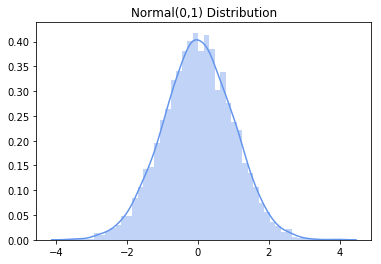

In [22]:
import seaborn as sns

np.random.seed(110)
normal_data = np.random.randn(5000)
sns.distplot(normal_data, color = 'cornflowerblue')
plt.title('Normal(0,1) Distribution')
plt.show()

The parameters of a Normal distribution have a simple interpretation: for $X \sim \mathcal{N}(\mu, \sigma^2)$, $X$'s mean is $\mu$, and its variance is $\sigma^2$. Moreover, the Normal has the nice property that the *mode* and *median* of the distribution are equal to the mean.

The Normal distribution is particularly famous because of something called the **Central Limit Theorem**, which states that for a sequence of i.i.d. random variables $Y_1, \dots, Y_n$, then the sum of $Y_i$ is distributed normally (at least asymptotically). More formally, if we let
$$ \bar Y = \frac{1}{n} \sum_{i=1}^n Y_i $$
Then 
$$ \lim_{n \to \infty} \frac{\sqrt{n} (\bar Y - E(Y))}{\text{SD}(Y)} \to^d \mathcal{N}(0, 1)  $$

where the $\to^d$ symbol means "converges to in distribution." The above limit can look confusing, it really just means that for sufficiently large $n$:
1. The average value of all the $Y_i$ is distributed normally with a mean at $E(Y_i)$ (i.e. the mean of any of the samples);
2. The variance of the average value of the random samples should be around $\frac{\text{Var}(Y_i)}{\sqrt{n}}$. This means that the variance decreases with the size of $n$, which makes sense intuitively: as we get more and more random samples, any outliers in the samples should start to cancel each other out, decreasing the variance of the sum of the samples. 

Remember, the Central Limit Theorem is not describing the behavior of the *samples,* but rather the behavior of their *sum* as $n$ increases.

The Normal distribution has a whole host of other exceedingly interesting properties, but many of them deserve their own post, and this post is long enough as it is. That's all for now!